# CS471: Introduction to Artificial Intelligence Assignment 4: Decision Tree Classification
### In this assignment, you will implement the Decision tree classification method using Scikit-learn.
by Zach Smith

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=load_iris()


In [2]:
data.keys()



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Include a basic description of the data (what are the features and labels) (1 point)
### Write in your own words of what the classification task is and why a decision tree is a reasonable model to try for this data. (1 point)
We can see from the data that our featuers are sepal length, sepal width, petal length and, petal width; all measured in cm.
Our labels, aka our outputs, are either: setosa, versicolor, or virginica.
Our classification task is to determine the species of an iris given the above four predictive attributes
A decision tree is a reasonable model to try for this dataset because. A decsion tree makes a statement, and then makes a decision based on wherether the statement was true or false. Decision tree classifier is easy to explain and it can hanlde qualitative predictors with simplicity.We are trying to classify these flowers with discrete outcomes so this makes a decision tree a good model to try.

In [8]:
df=pd.DataFrame(data['data'], columns=data['feature_names'])
df['target']=data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[Text(0.4, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.663\nsamples = 90\nvalue = [34.0, 30.0, 26.0]\nclass = setosa'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'petal length (cm) <= 4.85\ngini = 0.497\nsamples = 56\nvalue = [0, 30, 26]\nclass = versicolor'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'petal width (cm) <= 1.7\ngini = 0.067\nsamples = 29\nvalue = [0, 28, 1]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'sepal width (cm) <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5833333333333334, 'petal width (cm) <= 1.7\ngini = 0

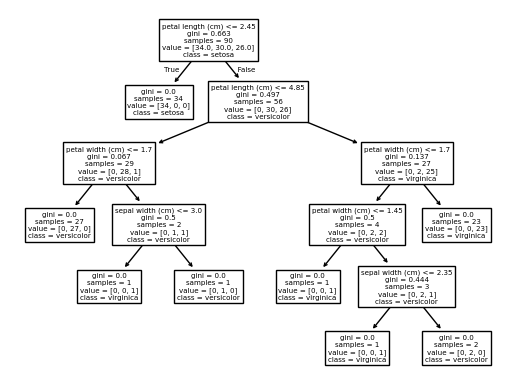

In [9]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],
    df['target'],
    test_size=0.2,
    random_state=27
)#splitting data. 80% train/val,20% test

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=32
)#splitting train and val. 75/25

clf=tree.DecisionTreeClassifier(random_state=15)
clf.fit(X_train,y_train)

#Plot initial tree
tree.plot_tree(clf,feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],class_names=['setosa', 'versicolor', 'virginica'])

In [10]:
params={#params we are going to test for grid search
    'max_depth': list(range(2,11)),
    'min_samples_split': list(range(2,11)),
    'min_samples_leaf' : list(range(1,5)),
    'criterion': ["gini","entropy","log_loss"],
    'max_features': ('sqrt', 'log2')
}
clf=tree.DecisionTreeClassifier()
grid=GridSearchCV(clf,param_grid=params,cv=10,n_jobs=-1,verbose=True)#running grid search


In [11]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 1944 candidates, totalling 19440 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ('sqrt', 'log2'),
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=True)

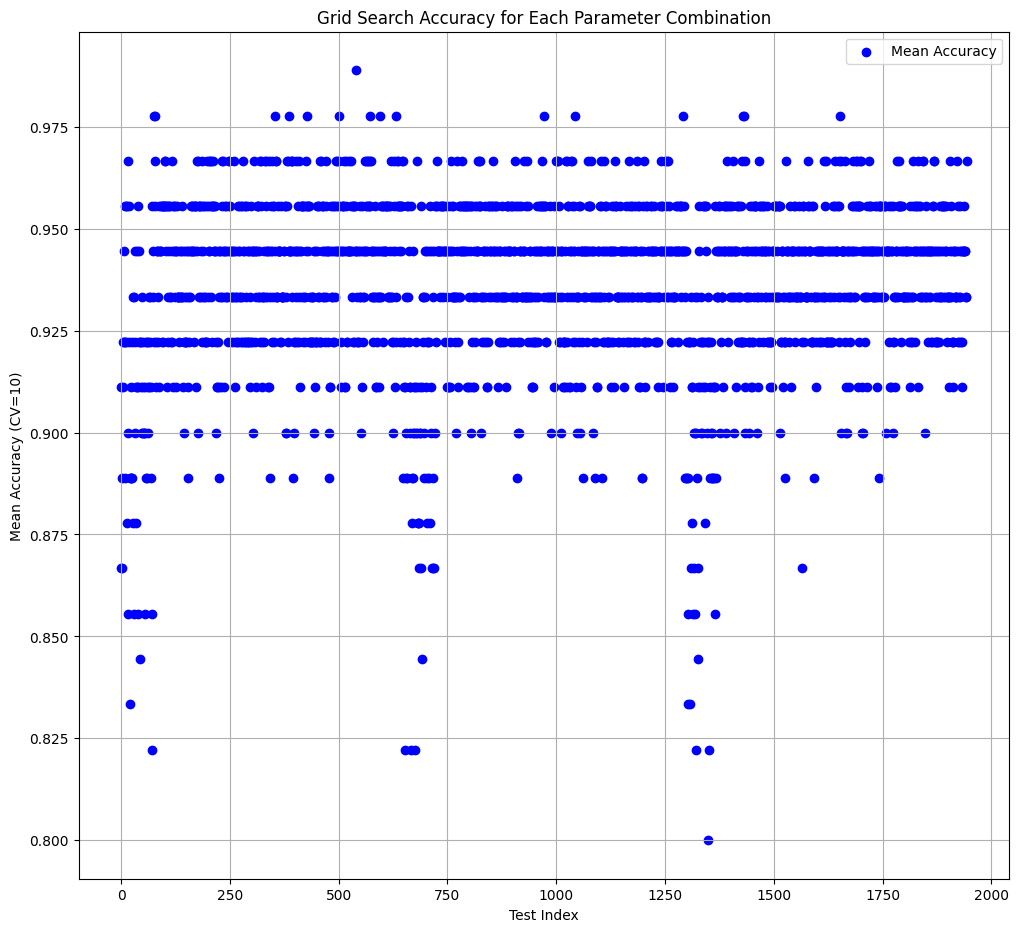

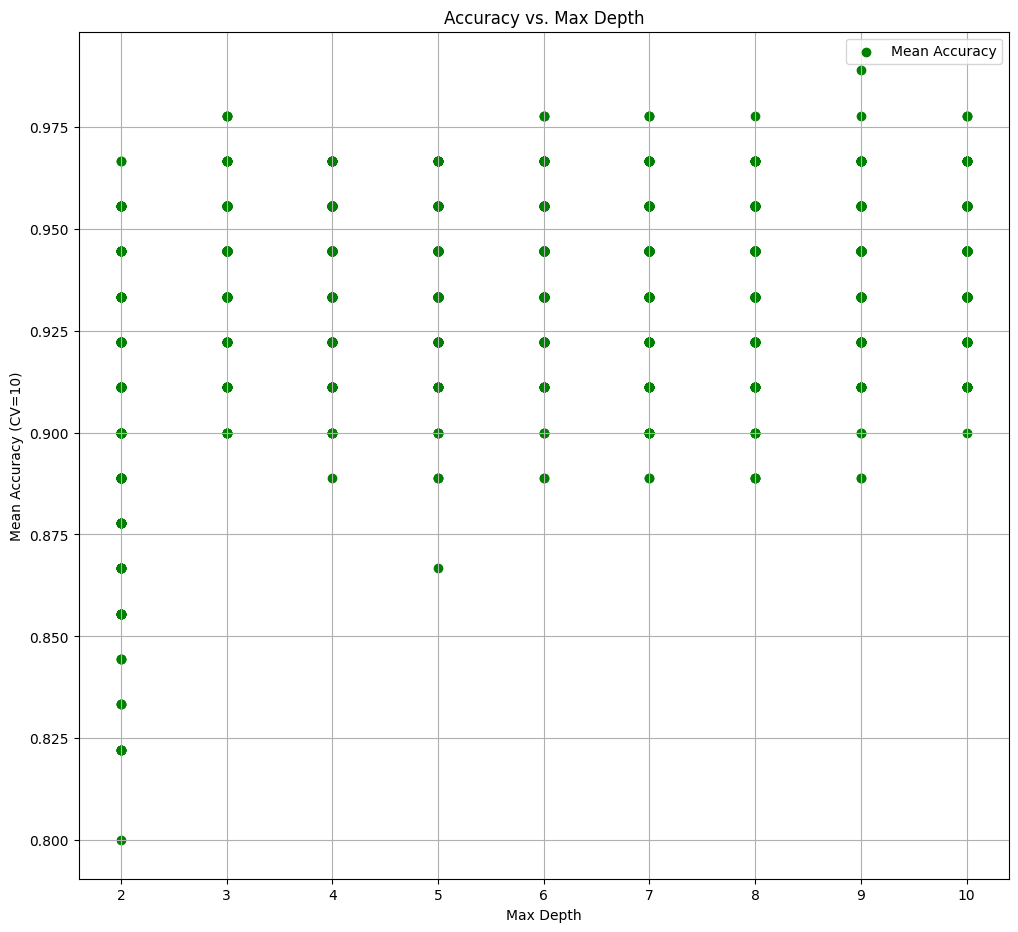

In [12]:
# Get the cross-validation results from the grid search
results = grid.cv_results_

# Extract mean test scores and parameters from the results
mean_test_scores = results['mean_test_score']
params = results['params']

# create first plot to show accuracy across all parameter combinations
plt.figure(figsize=(12, 11))
plt.scatter(range(len(mean_test_scores)), mean_test_scores, c='blue', label='Mean Accuracy') # plot mean accuracy for each parameter set

# add labels and title for the plot
plt.title('Grid Search Accuracy for Each Parameter Combination')
plt.xlabel('Test Index') # test index serves as x-axis
plt.ylabel('Mean Accuracy (CV=10)') # mean accuracy on y-axis
plt.grid(True) # add grid for readability
plt.legend()

# extract 'max_depth' values for each parameter combination in the grid
max_depth_values = [param['max_depth'] for param in params]

# create second plot to analyze accuracy based on max_depth specifically
plt.figure(figsize=(12, 11))
plt.scatter(max_depth_values, mean_test_scores, c='green', label='Mean Accuracy') # plot accuracy vs. max_depth

# add labels and title for max depth plot
plt.title('Accuracy vs. Max Depth')
plt.xlabel('Max Depth') # x-axis is max depth parameter
plt.ylabel('Mean Accuracy (CV=10)') # y-axis is mean accuracy
plt.grid(True) # add grid to improve readability
plt.legend()


Best Hyperparameters: 
{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10}


[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [43, 39, 38]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width (cm) <= 1.7\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.85\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 3, 2]\nclass = versicolor'),
 Text(0.75, 0.375, 'sepal length (cm) <= 5.95\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [0, 1, 6]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]\nclass = virginica')]

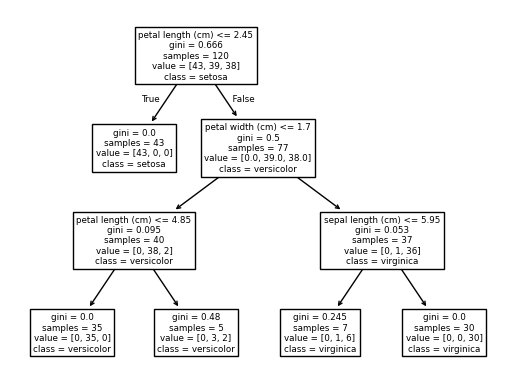

In [14]:
# import accuracy scoring and classification report for evaluation
from sklearn.metrics import accuracy_score, classification_report
import pprint

# get the best estimator (model with optimal hyperparameters) from grid search
final_clf = grid.best_estimator_

# print the best hyperparameters found during the grid search
print("Best Hyperparameters: ")
pprint.pp(grid.best_params_) # pretty print for readability

# fit the best model on the combined training and validation data
final_clf.fit(X_train_val, y_train_val)

# plot the decision tree of the best model
tree.plot_tree(
    final_clf,
    feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], # feature names for visualization
    class_names=['setosa', 'versicolor', 'virginica'] # class labels for tree nodes
)


In [18]:
# obtain cost complexity pruning path, this gives values of ccp_alpha that lead to different pruned trees
path = final_clf.cost_complexity_pruning_path(X_train, y_train)

# store the effective alpha values from the pruning path, omitting the last alpha (usually results in a root-only tree)
cca_alphas = path.ccp_alphas
cca_alphas = cca_alphas[:-1]

# initialize a list to store decision tree classifiers for each alpha
clfs = []

# iterate over each alpha to create a pruned tree and train it on training data
for cca_alpha in cca_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=cca_alpha) # create tree with specified alpha
    clf.fit(X_train, y_train) # train the model
    clfs.append(clf) # add model to list

cca_alpha: 0.0000 | Validation Accuracy: 0.9667
cca_alpha: 0.0018 | Validation Accuracy: 0.9667
cca_alpha: 0.0095 | Validation Accuracy: 0.9667
cca_alpha: 0.2469 | Validation Accuracy: 0.6000


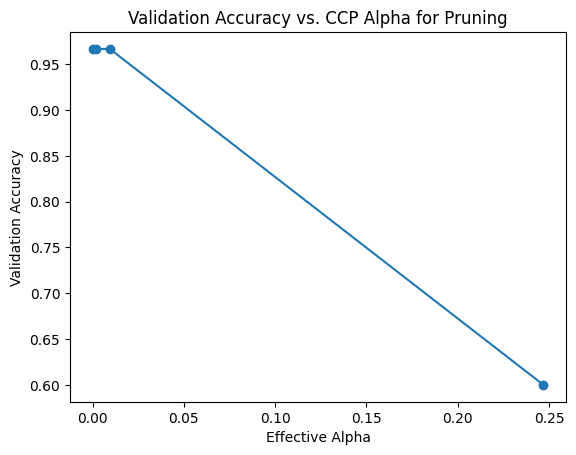

Best alpha: 0.0
Validation accuracy of final model: 0.9666666666666667


In [20]:
# calculate validation accuracy for each pruned tree to determine best alpha
val_scores = [accuracy_score(y_val, model.predict(X_val)) for model in clfs]

# print validation accuracy scores for each alpha to observe the trend
for alpha, score in zip(cca_alphas, val_scores):
    print(f"cca_alpha: {alpha:.4f} | Validation Accuracy: {score:.4f}")

# plot validation accuracy against each alpha value
plt.plot(cca_alphas, val_scores, marker='o')
plt.xlabel("Effective Alpha") # x-axis label for alpha values
plt.ylabel("Validation Accuracy") # y-axis label for accuracy
plt.title("Validation Accuracy vs. CCP Alpha for Pruning") # title for context
plt.show()

# select the alpha value that yields the highest validation accuracy
best_alpha = cca_alphas[val_scores.index(max(val_scores))]
best_alpha = cca_alphas[np.argmax(val_scores)] # using argmax to identify best alpha
pruned_tree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha) # initialize pruned tree with best alpha

# fit pruned tree on full training and validation data
pruned_tree.fit(X_train_val, y_train_val)

# print the chosen best alpha and the highest validation accuracy score
print(f"Best alpha: {best_alpha}")
print(f"Validation accuracy of final model: {max(val_scores)}")

Test Accuracy of Pruned Tree: 0.9000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.91      0.87        11
           2       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

Test Data Accuracy: 0.9


[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [43, 39, 38]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width (cm) <= 1.7\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.85\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 3, 2]\nclass = versicolor'),
 Text(0.75, 0.375, 'sepal length (cm) <= 5.95\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [0, 1, 6]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]\nclass = virginica')]

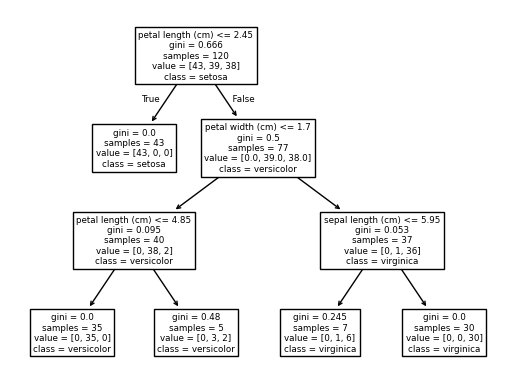

In [21]:
# evaluate the pruned model on the test data to get the final test accuracy
test_accuracy = accuracy_score(y_test, pruned_tree.predict(X_test))
print(f"Test Accuracy of Pruned Tree: {test_accuracy:.4f}")

# print classification report for detailed evaluation on test data
print(classification_report(y_test, pruned_tree.predict(X_test)))
print(f"Test Data Accuracy: {test_accuracy}")

# plot the tree structure of the final pruned tree
tree.plot_tree(
    final_clf,
    feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], # names of features
    class_names=['setosa', 'versicolor', 'virginica'] # names of target classes
)